In [129]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
import seaborn as sb

In [107]:
titanic = pd.read_csv(r'C:\\Users\habib\OneDrive\Рабочий стол\Питон\titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [108]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
x = titanic.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'Survived'], axis = 1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [110]:
y = titanic.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [111]:
x = pd.get_dummies(x)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
888,3,NaN,1,2,23.4500,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


In [112]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
x.Age.median()
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5334302325581395, 0.9722222222222222, 'x[6] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25290697674418605, 0.9166666666666666, 'x[7] <= 0.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.22965116279069767, 0.8611111111111112, 'x[0] <= 1.5\nentropy = 0.849\nsamples = 241\nvalue = [72, 169]'),
 Text(0.046511627906976744, 0.8055555555555556, 'x[1] <= 8.0\nentropy = 0.239\nsamples = 51\nvalue = [2, 49]'),
 Text(0.023255813953488372, 0.75, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06976744186046512, 0.75, 'x[4] <= 143.592\nentropy = 0.141\nsamples = 50\nvalue = [1, 49]'),
 Text(0.046511627906976744, 0.6944444444444444, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.09302325581395349, 0.6944444444444444, 'x[4] <= 152.506\nentropy = 0.592\nsamples = 11\nvalue = [1, 10]'),
 Text(0.06976744186046512, 0.6388888888888888, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.11627906976744186, 0.6388888888888888, 'entropy = 

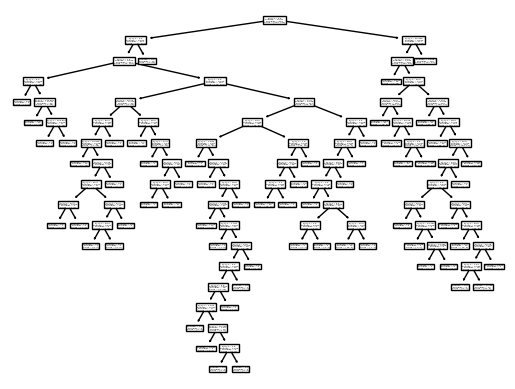

In [113]:
plot_tree(clf, filled = True)
tree.plot_tree(clf.fit(x,y)) 

[Text(0.5334302325581395, 0.9722222222222222, 'x[6] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25290697674418605, 0.9166666666666666, 'x[7] <= 0.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.22965116279069767, 0.8611111111111112, 'x[0] <= 1.5\nentropy = 0.849\nsamples = 241\nvalue = [72, 169]'),
 Text(0.046511627906976744, 0.8055555555555556, 'x[1] <= 8.0\nentropy = 0.239\nsamples = 51\nvalue = [2, 49]'),
 Text(0.023255813953488372, 0.75, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06976744186046512, 0.75, 'x[4] <= 143.592\nentropy = 0.141\nsamples = 50\nvalue = [1, 49]'),
 Text(0.046511627906976744, 0.6944444444444444, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.09302325581395349, 0.6944444444444444, 'x[4] <= 152.506\nentropy = 0.592\nsamples = 11\nvalue = [1, 10]'),
 Text(0.06976744186046512, 0.6388888888888888, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.11627906976744186, 0.6388888888888888, 'entropy = 

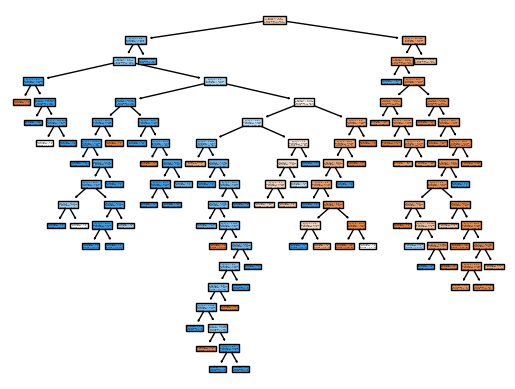

In [114]:
plot_tree(clf, filled = True)

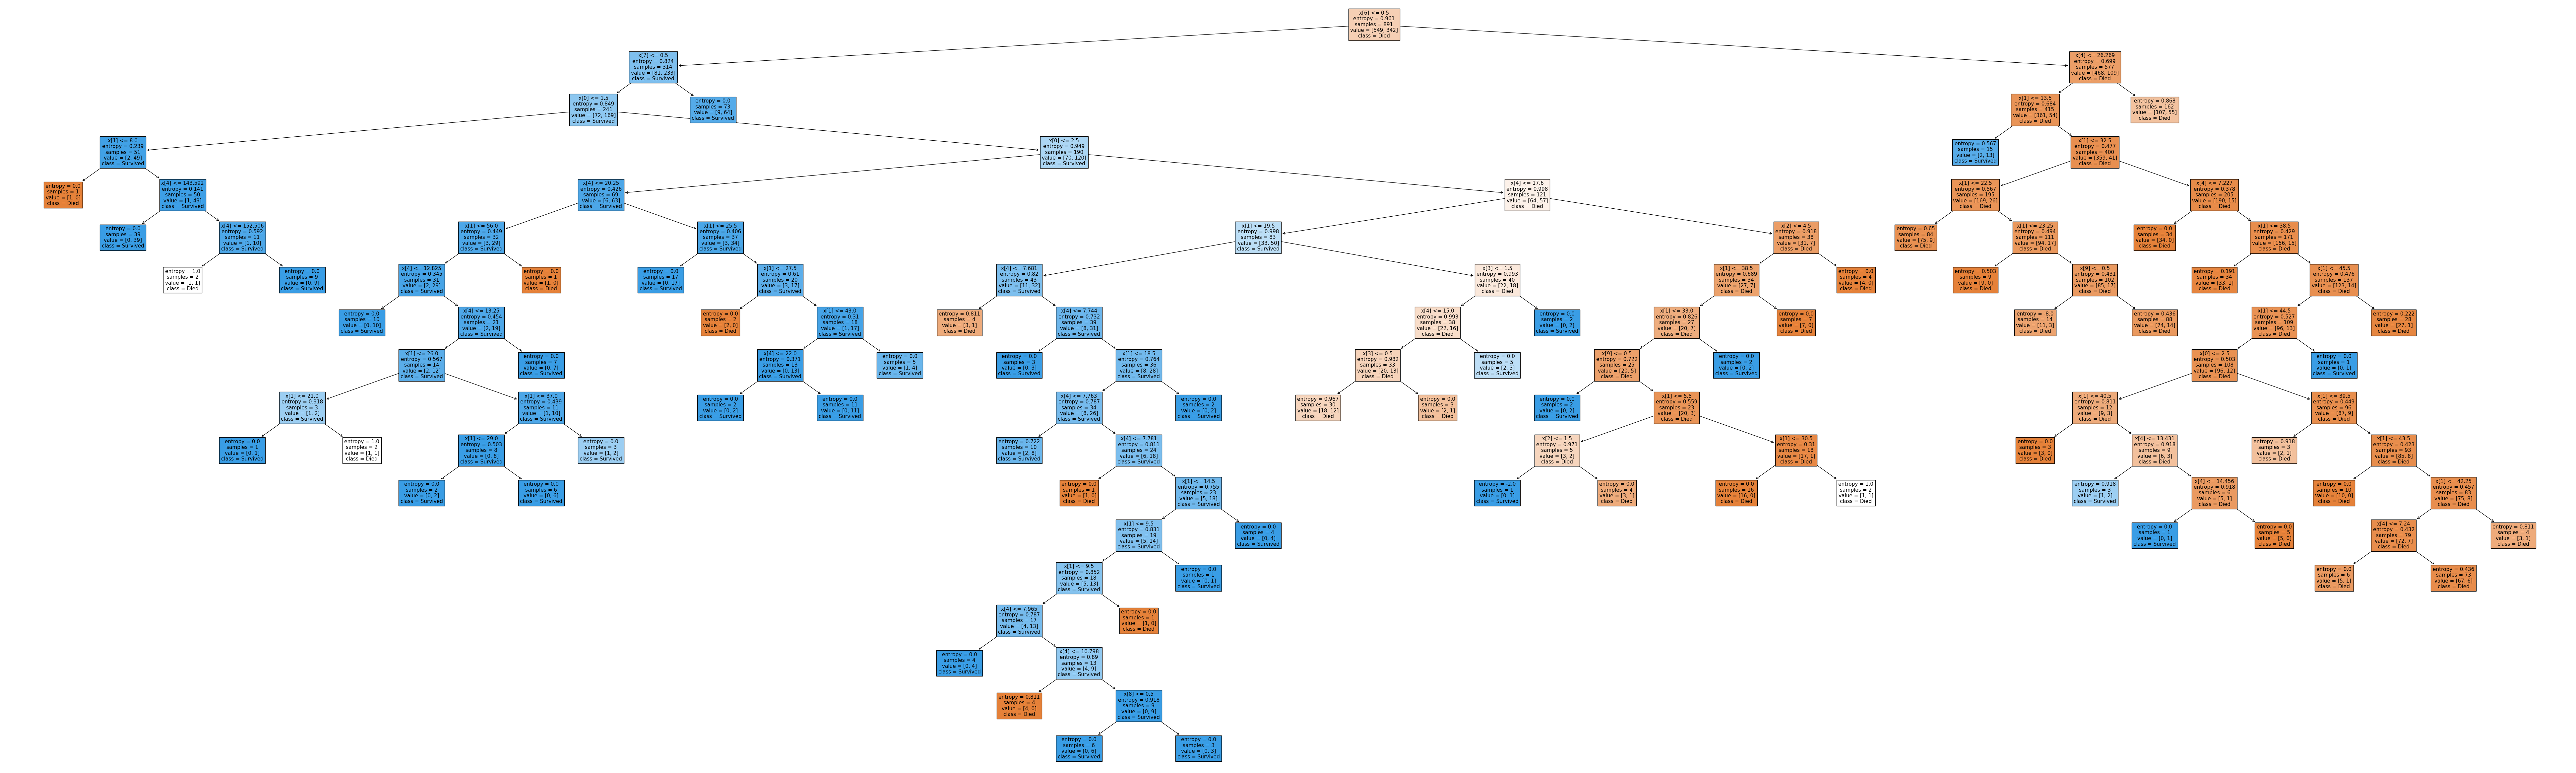

In [115]:
plt.figure(figsize = (100, 30))
tree.plot_tree(clf, class_names = ['Died', 'Survived'], filled = True, fontsize = 11)
plt.show()

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [117]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,False,True,False,False,True
718,3,NaN,0,0,15.5000,False,True,False,True,False
685,2,25.0,1,2,41.5792,False,True,True,False,False
73,3,26.0,1,0,14.4542,False,True,True,False,False
882,3,22.0,0,0,10.5167,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,True,False,False,False,True
270,1,NaN,0,0,31.0000,False,True,False,False,True
860,3,41.0,2,0,14.1083,False,True,False,False,True
435,1,14.0,1,2,120.0000,True,False,False,False,True


In [118]:
y_train

6      0
718    0
685    0
73     0
882    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 596, dtype: int64

In [119]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,NaN,1,1,15.2458,False,True,True,False,False
439,2,31.0,0,0,10.5000,False,True,False,False,True
840,3,20.0,0,0,7.9250,False,True,False,False,True
720,2,6.0,0,1,33.0000,True,False,False,False,True
39,3,14.0,1,0,11.2417,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
715,3,19.0,0,0,7.6500,False,True,False,False,True
525,3,40.5,0,0,7.7500,False,True,False,True,False
381,3,1.0,0,2,15.7417,True,False,True,False,False
140,3,NaN,0,2,15.2458,True,False,True,False,False


In [120]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

In [121]:
clf.score(x,y)

0.8552188552188552

In [122]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [123]:
clf.score(x_train,y_train)

0.9010067114093959

In [124]:
clf.score(x_test, y_test)

0.8

In [125]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    temp_score_data =pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 'test_score' : [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.793624,0.800000
0,3,0.802013,0.776271
0,4,0.793624,0.800000
0,5,0.840604,0.793220
...,...,...,...
0,95,0.895973,0.803390
0,96,0.899329,0.793220
0,97,0.879195,0.806780
0,98,0.852349,0.766102


In [126]:
scores_data.max()

max_depth      99.000000
train_score     0.926174
test_score      0.833898
dtype: float64

In [128]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score'], var_name = 'set_type', value_name = 'score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.793624
2,3,train_score,0.802013
3,4,train_score,0.793624
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.803390
194,96,test_score,0.793220
195,97,test_score,0.806780
196,98,test_score,0.766102


<Axes: xlabel='max_depth', ylabel='score'>

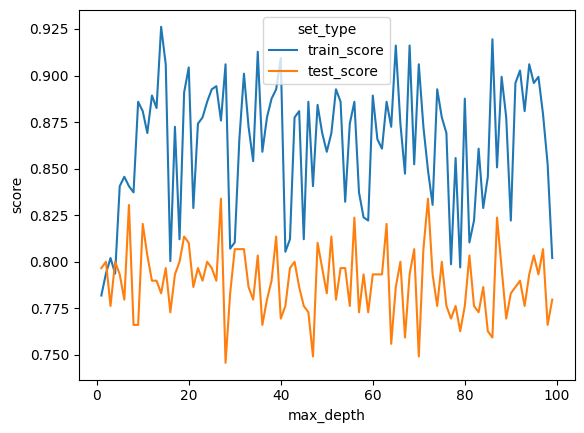

In [130]:
sb.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)